In [1]:
import os
import sys
from itertools import product
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from src.models.train_model import BTCForecasting

import pickle

sys.dont_write_bytecode = True
from src.utils.utils import *
from src.utils.constants import *
from src.visualization.visualize import *

In [2]:
data = {
    (exchange, data_type): pd.read_parquet(
        os.path.join(INTERIM_DATA_PATH, f'{exchange}_{data_type}_data.parquet')
    )
    for exchange, data_type in product(EXCHANGES, DATA_TYPES)
}
data[(ALL, UNIFIED)] = pd.read_parquet(os.path.join(INTERIM_DATA_PATH, f'{ALL}_{UNIFIED}_data.parquet'))

ground_truth = pd.read_parquet(os.path.join(INTERIM_DATA_PATH, 'ground_truth_data.parquet'))

In [3]:
# Training params

view_params = {
    'candles': {
        'use_smoteenn': False,
        'use_rfe': False,
        'max_depth_range': range(4, 9),
        'min_samples_leaf_range': range(1, 5),
        'min_samples_split_range': range(2, 10),
        'max_leaf_nodes': [10, 20, 50],
        'factor': 2,
        'aggresive_elimination': False,
        'n_splits': 5,
    },
    'orderbook': {
        'use_smoteenn': False,
        'use_rfe': False,
        'max_depth_range': range(4, 9),
        'min_samples_leaf_range': range(1, 5),
        'min_samples_split_range': range(2, 10),
        'max_leaf_nodes': [10, 20, 50],
        'factor': 2,
        'aggresive_elimination': False,
        'n_splits': 5,
    },
    'unified': {
        'use_smoteenn': False,
        'use_rfe': False,
        'max_depth_range': range(4, 9),
        'min_samples_leaf_range': range(1, 5),
        'min_samples_split_range': range(2, 10),
        'max_leaf_nodes': [10, 20, 50, 100],
        'factor': 2,
        'aggresive_elimination': False,
        'n_splits': 5,
    }
}

In [5]:
# Training

btcfs = {}

for (exchange, data_type), df in data.items():

    for key, value in view_params[data_type].items():
        exec(f"{key} = {value}")
    
    print(f"\nBest RFC model for {exchange} - {data_type}")

    classifier = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced_subsample')

    btcf = BTCForecasting(df, ground_truth, n_splits=n_splits, smoteenn=use_smoteenn, rfe=use_rfe)

    model_params = {
        # 'classifier__criterion': criteria,
        'classifier__max_depth': max_depth_range,
        'classifier__min_samples_leaf': min_samples_leaf_range,   
        'classifier__min_samples_split': min_samples_split_range,
        'classifier__max_leaf_nodes': max_leaf_nodes
    }
    btcf.train_rfc_grid(classifier, model_params, factor=factor, aggressive_elimination=aggresive_elimination)
    btcfs[(exchange, data_type)] = btcf

    # Save the best model and results
    model_path = os.path.join(MODELS_DATA_PATH, f"{exchange}_{data_type}_rfc_model.pkl")

    with open(model_path, "wb") as f:
        pickle.dump(btcf, open(model_path, "wb"))

del(data)


Best RFC model for BINANCE - candles
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 1721
max_resources_: 418344
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 672
n_resources: 1721
Fitting 10 folds for each of 672 candidates, totalling 6720 fits
----------
iter: 1
n_candidates: 224
n_resources: 1721
Fitting 10 folds for each of 224 candidates, totalling 2240 fits
----------
iter: 2
n_candidates: 75
n_resources: 5163
Fitting 10 folds for each of 75 candidates, totalling 750 fits
----------
iter: 3
n_candidates: 25
n_resources: 15489
Fitting 10 folds for each of 25 candidates, totalling 250 fits
----------
iter: 4
n_candidates: 9
n_resources: 46467
Fitting 10 folds for each of 9 candidates, totalling 90 fits
----------
iter: 5
n_candidates: 3
n_resources: 139401
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Best RFC model for BINANCE - orderbook
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 5
m

/Users/francescoperagine/Documents/Repository/big_data_bitcoin_forecasting/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


----------
iter: 5
n_candidates: 3
n_resources: 126846
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Best RFC model for HUOBI - candles
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 1335
max_resources_: 324421
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 672
n_resources: 1335
Fitting 10 folds for each of 672 candidates, totalling 6720 fits
----------
iter: 1
n_candidates: 224
n_resources: 1335
Fitting 10 folds for each of 224 candidates, totalling 2240 fits
----------
iter: 2
n_candidates: 75
n_resources: 4005
Fitting 10 folds for each of 75 candidates, totalling 750 fits
----------
iter: 3
n_candidates: 25
n_resources: 12015
Fitting 10 folds for each of 25 candidates, totalling 250 fits
----------
iter: 4
n_candidates: 9
n_resources: 36045
Fitting 10 folds for each of 9 candidates, totalling 90 fits
----------
iter: 5
n_candidates: 3
n_resources: 108135
Fitting 10 folds for each of 3 candidates, totalling 3

/Users/francescoperagine/Documents/Repository/big_data_bitcoin_forecasting/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best RFC model for ALL - unified
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 1106
max_resources_: 268869
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 672
n_resources: 1106
Fitting 10 folds for each of 672 candidates, totalling 6720 fits
----------
iter: 1
n_candidates: 224
n_resources: 1106
Fitting 10 folds for each of 224 candidates, totalling 2240 fits
----------
iter: 2
n_candidates: 75
n_resources: 3318
Fitting 10 folds for each of 75 candidates, totalling 750 fits
----------
iter: 3
n_candidates: 25
n_resources: 9954
Fitting 10 folds for each of 25 candidates, totalling 250 fits
----------
iter: 4
n_candidates: 9
n_resources: 29862
Fitting 10 folds for each of 9 candidates, totalling 90 fits
----------
iter: 5
n_candidates: 3
n_resources: 89586
Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Users/francescoperagine/Documents/Repository/big_data_bitcoin_forecasting/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [6]:
btcfs = {
    (exchange, data_type): pd.read_pickle(
        os.path.join(MODELS_DATA_PATH, f"{exchange}_{data_type}_rfc_model.pkl")
    )
    for exchange, data_type in product(EXCHANGES, DATA_TYPES)
}
btcfs[(ALL, UNIFIED)] = pd.read_pickle(os.path.join(MODELS_DATA_PATH, f'{ALL}_{UNIFIED}_rfc_model.pkl'))

Best RFC model for BINANCE - candles
Parameters: {'classifier__max_depth': 6, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4}
Best score: 0.49997632575757567
Confusion matrix:


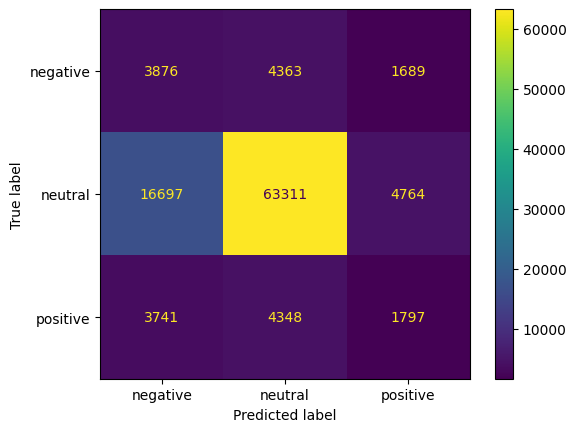

<Figure size 640x480 with 0 Axes>

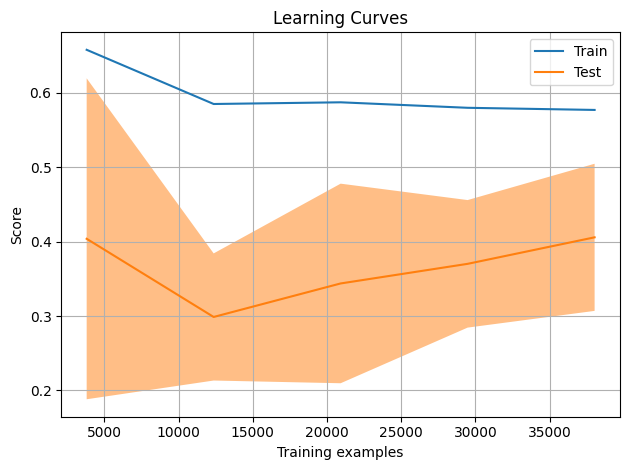

<Figure size 640x480 with 0 Axes>

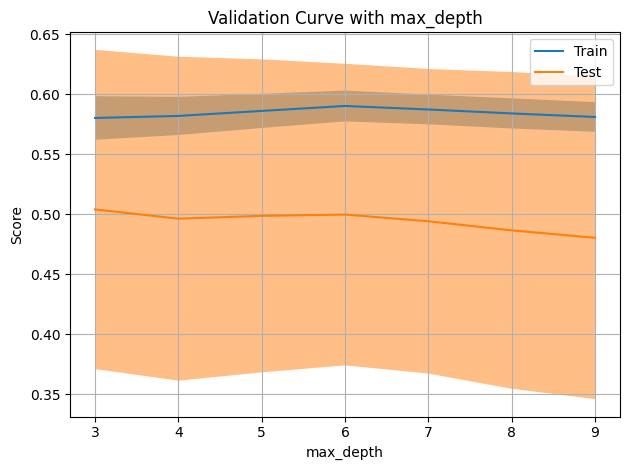

Best RFC model for BINANCE - orderbook
Parameters: {'classifier__max_depth': 7, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 8}
Best score: 0.35865926632555717
Confusion matrix:


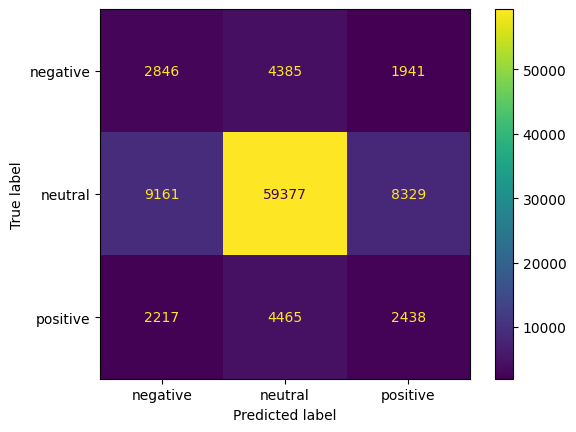

<Figure size 640x480 with 0 Axes>

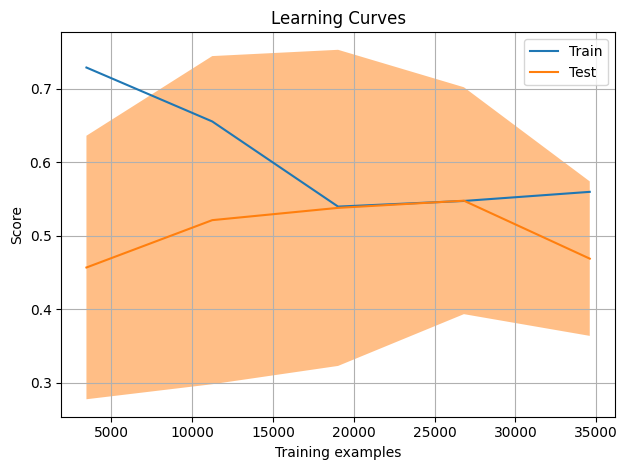

<Figure size 640x480 with 0 Axes>

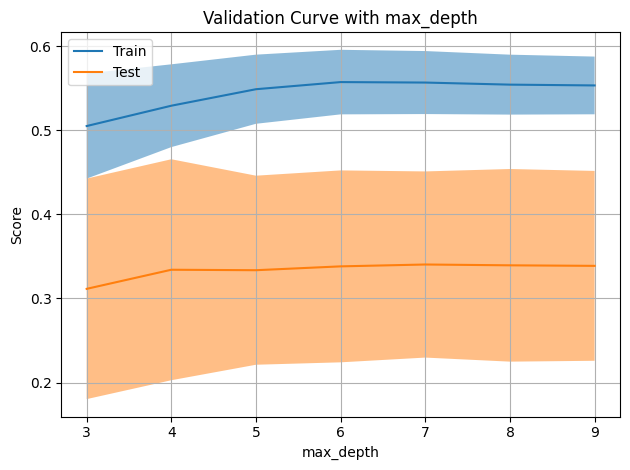

Best RFC model for BINANCE - unified
Parameters: {'classifier__max_depth': 6, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 3}
Best score: 0.49549041713641495
Confusion matrix:


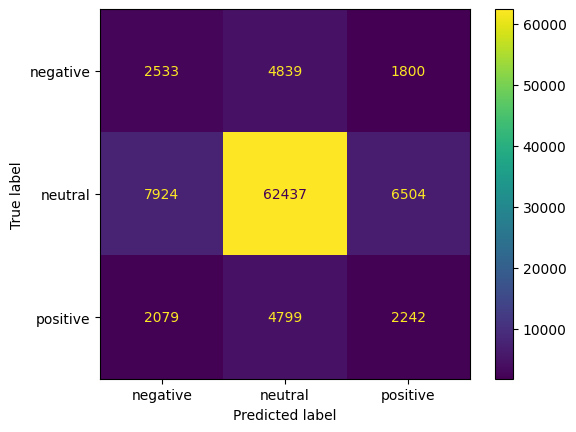

<Figure size 640x480 with 0 Axes>

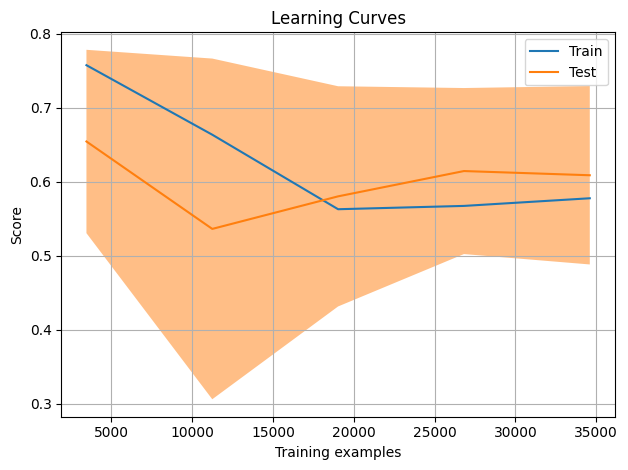

/Users/francescoperagine/Documents/Repository/big_data_bitcoin_forecasting/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

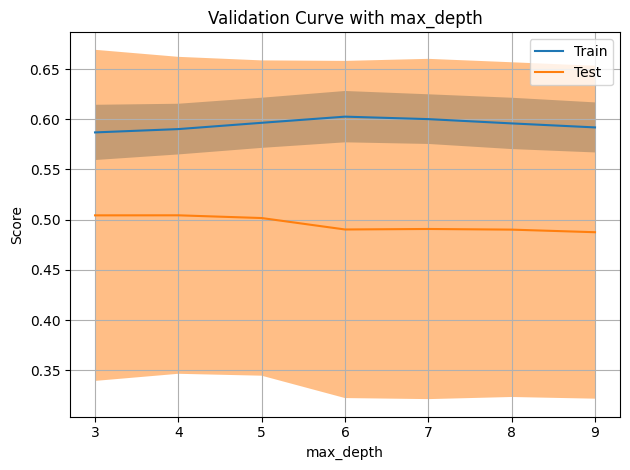

Best RFC model for HUOBI - candles
Parameters: {'classifier__max_depth': 9, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4}
Best score: 0.4429298067141404
Confusion matrix:


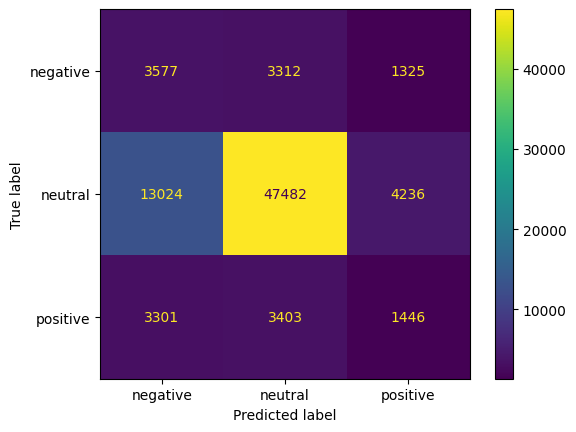

<Figure size 640x480 with 0 Axes>

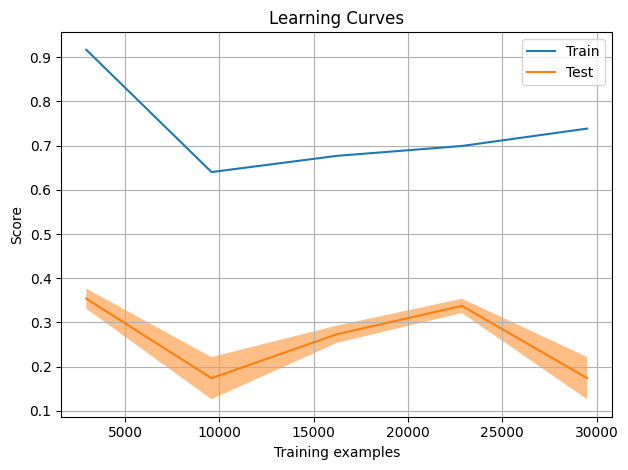

<Figure size 640x480 with 0 Axes>

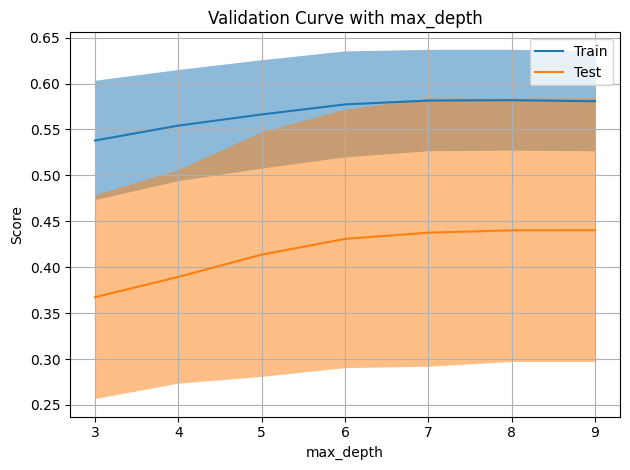

Best RFC model for HUOBI - orderbook
Parameters: {'classifier__max_depth': 9, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6}
Best score: 0.42982947624847745
Confusion matrix:


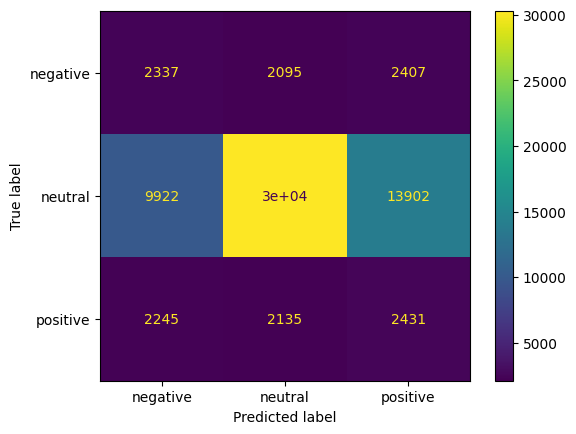

<Figure size 640x480 with 0 Axes>

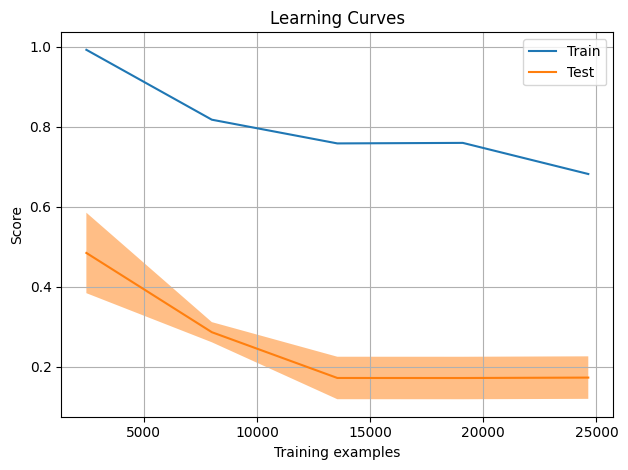

<Figure size 640x480 with 0 Axes>

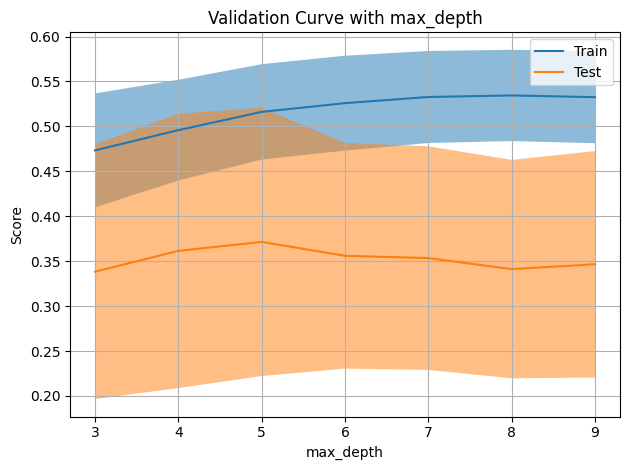

Best RFC model for HUOBI - unified
Parameters: {'classifier__max_depth': 9, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best score: 0.4930937880633374
Confusion matrix:


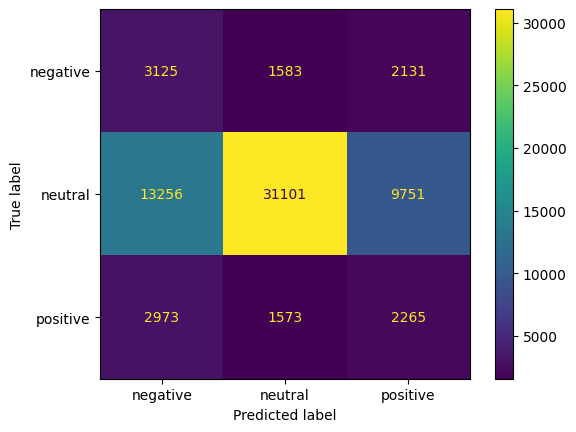

<Figure size 640x480 with 0 Axes>

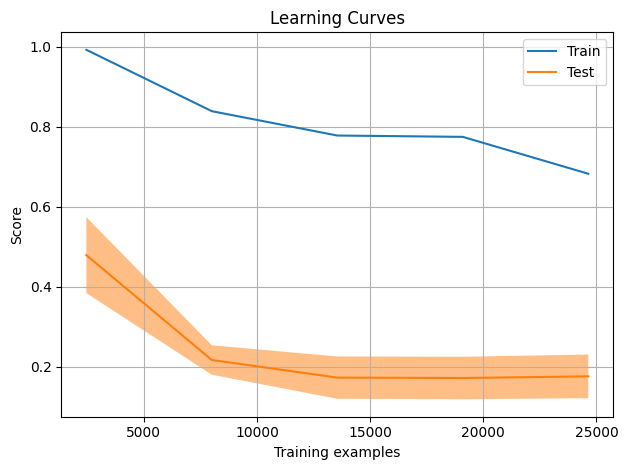

<Figure size 640x480 with 0 Axes>

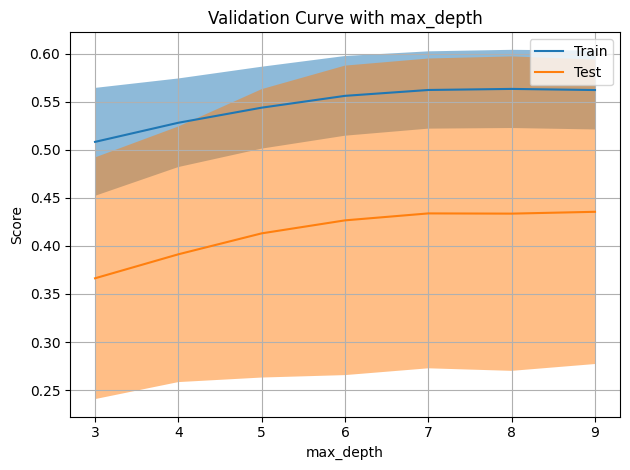

Best RFC model for OKX - candles
Parameters: {'classifier__max_depth': 8, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 6}
Best score: 0.4546104360257327
Confusion matrix:


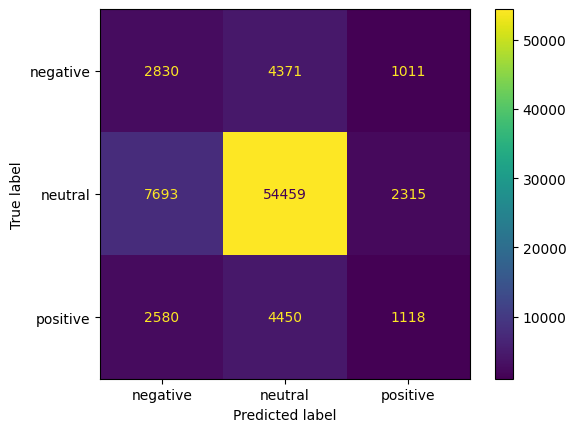

<Figure size 640x480 with 0 Axes>

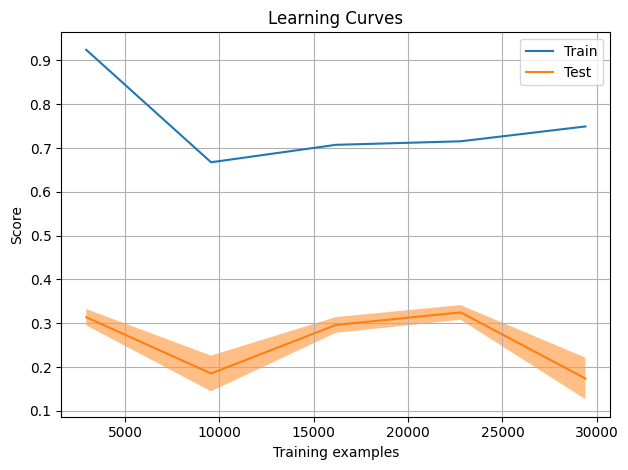

<Figure size 640x480 with 0 Axes>

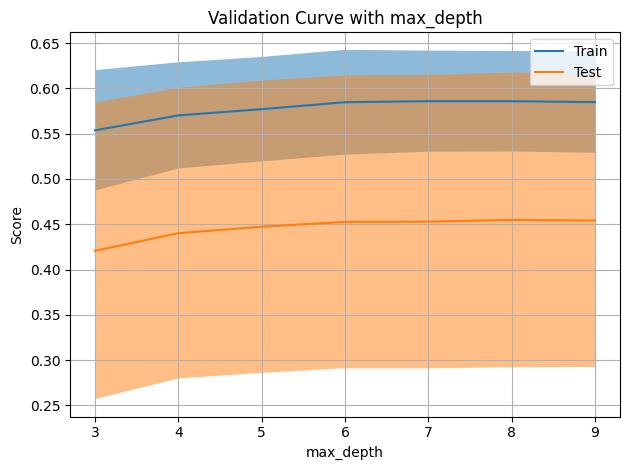

Best RFC model for OKX - orderbook
Parameters: {'classifier__max_depth': 9, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5}
Best score: 0.4518725015779507
Confusion matrix:


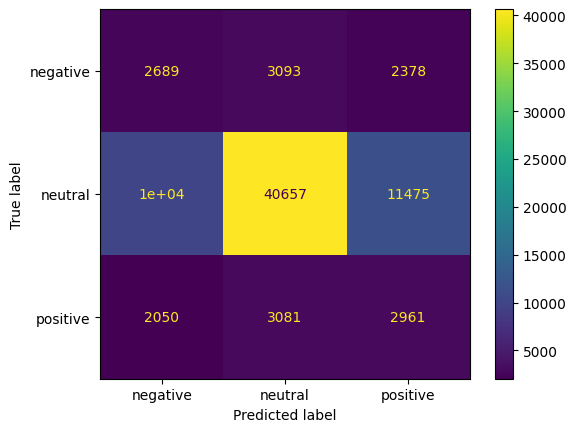

<Figure size 640x480 with 0 Axes>

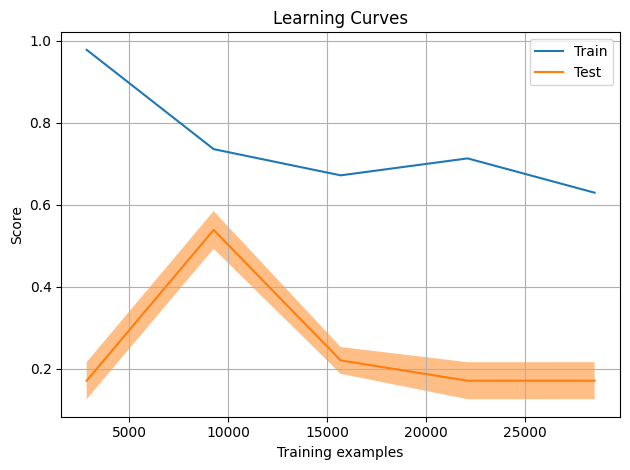

<Figure size 640x480 with 0 Axes>

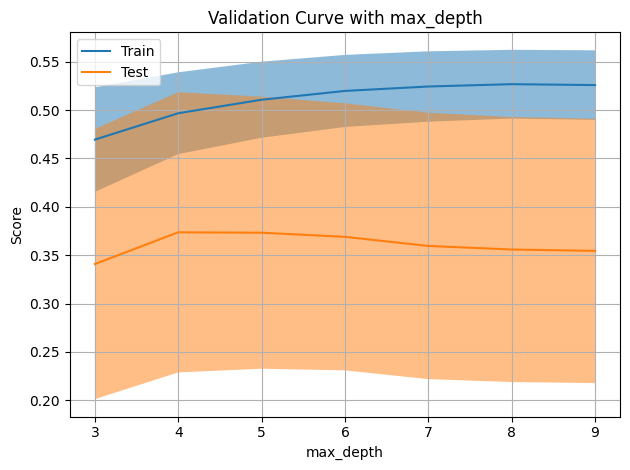

Best RFC model for OKX - unified
Parameters: {'classifier__max_depth': 9, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Best score: 0.5003687704140765
Confusion matrix:


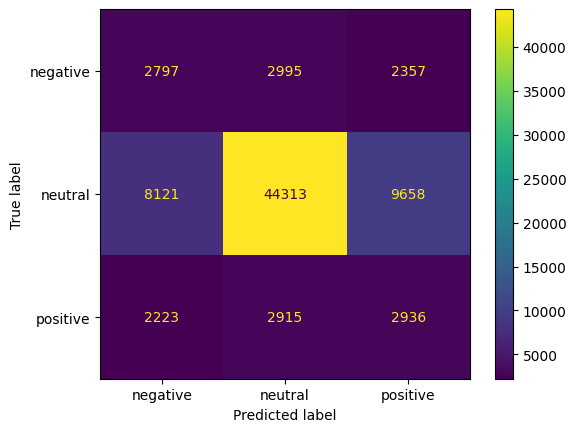

<Figure size 640x480 with 0 Axes>

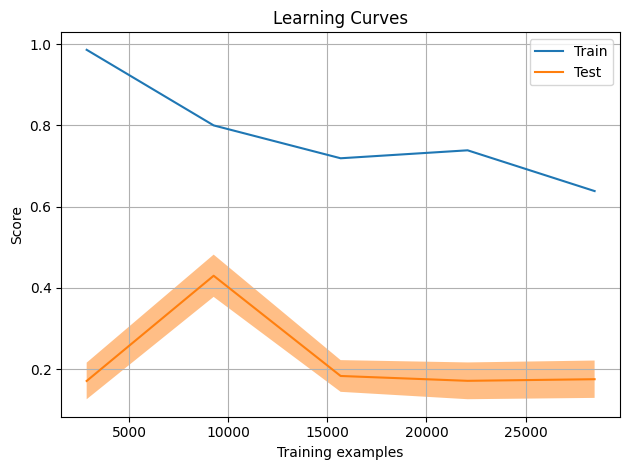

<Figure size 640x480 with 0 Axes>

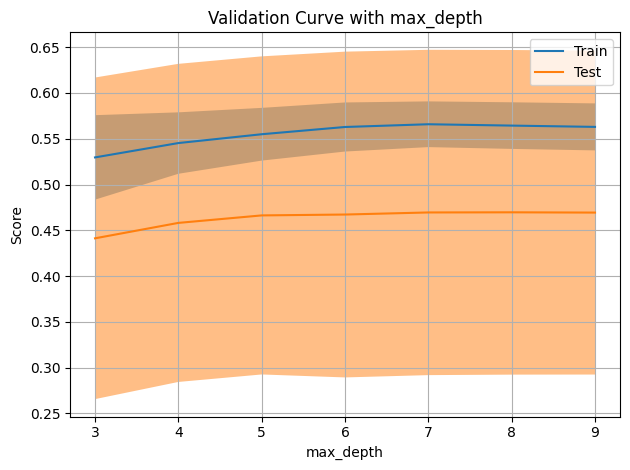

Best RFC model for ALL - unified
Parameters: {'classifier__max_depth': 8, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 9}
Best score: 0.5526832862581357
Confusion matrix:


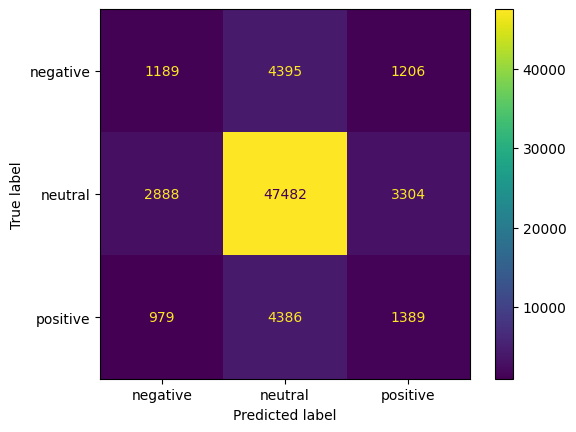

<Figure size 640x480 with 0 Axes>

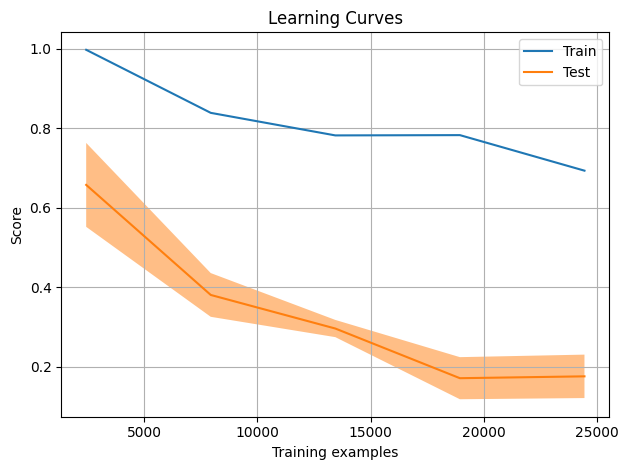

<Figure size 640x480 with 0 Axes>

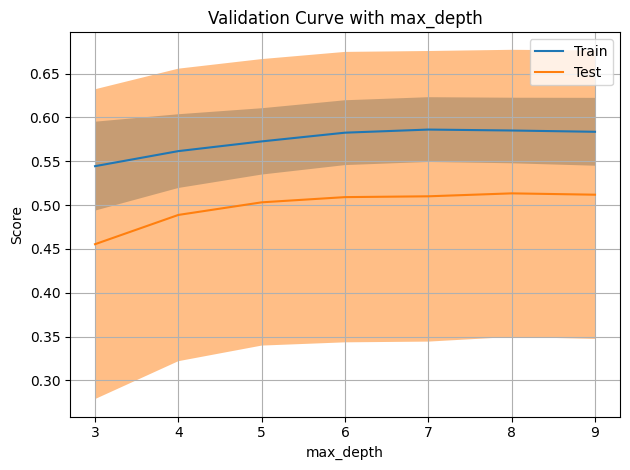

In [7]:
# Evaluation

eval_results = []
for (exchange, data_type), btcf in btcfs.items():
        print(f"Best RFC model for {exchange} - {data_type}")

        btcf.evaluate_model()

        print(f"Parameters: {btcf.results['best_params']}")
        print(f"Best score: {btcf.results['best_score']}")

        print(f"Confusion matrix:")
        plot_confusion_matrix(confusion_matrix=btcf.results['conf_matrix'], display_labels=list(btcf.le.classes_))

        # Plots
        if(btcf.rfe):
                btcf.plot_feature_importance(f"{exchange}_{data_type}_rfc_feature_importance.png")
        btcf.plot_learning_curves(f"{exchange}_{data_type}_rfc_learning_curve.png")
        btcf.plot_validation_curves('max_depth', view_params[data_type]['max_depth_range'], f"{exchange}_{data_type}_rfc_validation_curve_max_depth.png")

In [67]:
from  sklearn.metrics import precision_recall_fscore_support

eval_results = []
for (exchange, data_type), btcf in btcfs.items():
    y_pred = btcf.model.predict(btcf.X_test)
    accuracy = btcf.results['accuracy']
    precision = btcf.results['precision']
    recall = btcf.results['recall']
    fscore = btcf.results['f1_score']
    # precision, recall, fscore, _ = precision_recall_fscore_support(btcf.y_test, y_pred, average='macro')
    best_params = btcf.results.get('best_params')
    eval_results.append([exchange, data_type, accuracy, precision, recall, fscore, best_params])
display(pd.DataFrame(eval_results, columns=['Exchange', 'Data Type', 'Accuracy', 'Precision', 'Recall', 'F1 Score']))

,Exchange,Data Type,Accuracy,Precision,Recall,F1 Score,Best Params
0,BINANCE,candles,0.659591,0.418761,0.439674,0.410709,"{'classifier__max_depth': 6, 'classifier__max_..."
1,BINANCE,orderbook,0.679505,0.420739,0.450027,0.428378,"{'classifier__max_depth': 7, 'classifier__max_..."
2,BINANCE,unified,0.706327,0.426976,0.444765,0.433265,"{'classifier__max_depth': 6, 'classifier__max_..."
3,HUOBI,candles,0.647363,0.420732,0.448768,0.414558,"{'classifier__max_depth': 9, 'classifier__max_..."
4,HUOBI,orderbook,0.517333,0.389434,0.419453,0.364248,"{'classifier__max_depth': 9, 'classifier__max_..."
5,HUOBI,unified,0.538549,0.409814,0.454761,0.386227,"{'classifier__max_depth': 9, 'classifier__max_..."
6,OKX,candles,0.722617,0.442720,0.442196,0.431907,"{'classifier__max_depth': 8, 'classifier__max_..."
7,OKX,orderbook,0.590372,0.408685,0.449753,0.405993,"{'classifier__max_depth': 9, 'classifier__max_..."
8,OKX,unified,0.639035,0.430515,0.473512,0.435621,"{'classifier__max_depth': 9, 'classifier__max_..."
9,ALL,unified,0.744741,0.438186,0.421801,0.428033,"{'classifier__max_depth': 8, 'classifier__max_..."


In [59]:
# Evaluation results

eval_results = []
for (exchange, data_type), btcf in btcfs.items():

    result = {
        'exchange': exchange,
        'data_type': data_type,
        'accuracy': btcf.results.get('accuracy'),
    }
    best_params = btcf.results.get('best_params')
    result.update(best_params)
    eval_results.append(result)

eval_results_df = pd.DataFrame(eval_results)
display(eval_results_df)


,exchange,data_type,accuracy,classifier__max_depth,classifier__max_leaf_nodes,classifier__min_samples_leaf,classifier__min_samples_split
0,BINANCE,candles,0.659591,6,50,1,4
1,BINANCE,orderbook,0.679505,7,50,2,8
2,BINANCE,unified,0.706327,6,50,1,3
3,HUOBI,candles,0.647363,9,50,1,4
4,HUOBI,orderbook,0.517333,9,50,1,6
5,HUOBI,unified,0.538549,9,50,1,2
6,OKX,candles,0.722617,8,50,2,6
7,OKX,orderbook,0.590372,9,50,4,5
8,OKX,unified,0.639035,9,50,4,2
9,ALL,unified,0.744741,8,50,2,9


In [ ]:
# Performing t-tests for each metric

metrics = ['mean_test_score', 'mean_fit_time', 'mean_score_time', 'mean_train_score']
ttest_results = pd.concat([perform_ttest(eval_results_df, metric) for metric in metrics], ignore_index=True)

display(ttest_results)

,data_type,exchange1,exchange2,metric,t_stat,p_value
0,candles,BINANCE,HUOBI,mean_test_score,21.224245,6.544091e-89
1,candles,BINANCE,OKX,mean_test_score,22.462574,8.561449e-99
2,candles,HUOBI,OKX,mean_test_score,-0.326225,7.442884e-01
3,orderbook,BINANCE,HUOBI,mean_test_score,4.367686,1.328769e-05
4,orderbook,BINANCE,OKX,mean_test_score,-9.209416,9.517893e-20
5,orderbook,HUOBI,OKX,mean_test_score,-17.661925,5.525873e-65
6,unified,BINANCE,HUOBI,mean_test_score,-0.007530,9.939928e-01
7,unified,BINANCE,OKX,mean_test_score,0.133748,8.936155e-01
8,unified,BINANCE,ALL,mean_test_score,-22.037583,3.751755e-96
9,unified,HUOBI,OKX,mean_test_score,0.150667,8.802542e-01


In [ ]:
# Results comparison

data_types = eval_results_df['data_type'].unique()
all_comparisons = pd.concat([compute_comparison(eval_results_df, data_type) for data_type in data_types], ignore_index=True)

display(all_comparisons)

,data_type,exchange1,exchange2,exchange1_mean_lower,exchange1_mean_upper,exchange2_mean_lower,exchange2_mean_upper,mean_diff_lower,mean_diff_upper,exchange1_ci_percentage,exchange2_ci_percentage,mean_diff_ci_percentage
0,candles,BINANCE,HUOBI,0.549320,0.553323,0.508807,0.515059,0.035464,0.043233,0.728751,1.228792,21.905024
1,candles,BINANCE,OKX,0.549178,0.553166,0.510026,0.515382,0.035341,0.042066,0.726118,1.050183,19.029334
2,candles,HUOBI,OKX,0.508925,0.514751,0.509818,0.515240,-0.004483,0.003322,1.144775,1.063615,174.107410
3,orderbook,BINANCE,HUOBI,0.505276,0.513967,0.494281,0.500338,0.006856,0.017476,1.720117,1.225260,154.905551
4,orderbook,BINANCE,OKX,0.505224,0.514005,0.531781,0.537316,-0.030118,-0.019689,1.738062,1.040851,34.625818
5,orderbook,HUOBI,OKX,0.494544,0.500373,0.531898,0.537144,-0.041096,-0.032885,1.178673,0.986279,19.979013
6,unified,BINANCE,HUOBI,0.570884,0.576235,0.571274,0.575798,-0.003487,0.003444,0.937335,0.791985,198.753875
7,unified,BINANCE,OKX,0.570740,0.576132,0.570460,0.575950,-0.003470,0.003975,0.944743,0.962392,214.563123
8,unified,BINANCE,ALL,0.570666,0.576232,0.610501,0.614881,-0.042486,-0.035869,0.975322,0.717377,15.575309
9,unified,HUOBI,OKX,0.571194,0.575662,0.570502,0.575996,-0.003404,0.003830,0.782249,0.962880,212.508588


### General Insights
BINANCE models generally outperform those from HUOBI and OKX, with significant differences in most metrics, suggesting better market conditions for BINANCE. Thus, the focus should be on leveraging BINANCE data for more accurate predictions, as it consistently shows better performance. Improving data pipelines for HUOBI and OKX could also help boost their predictive capabilities. 

The t-tests on train and test scores indicate that some models, especially from HUOBI, may be underfitting, as seen in lower training and testing scores. Conversely, significant differences between train and test scores for BINANCE models suggest potential overfitting, necessitating more robust validation techniques.

Underfitting should be addressed by improving feature engineering for HUOBI and OKX datasets, and mitigate overfitting in BINANCE models through better cross-validation and regularization.